Datos originales:
    consumo_cafeina  horas_estudio  horas_sueno
0                1              2            8
1                2              5            6
2                0              3            7
3                3              6            5
4                2              4            6


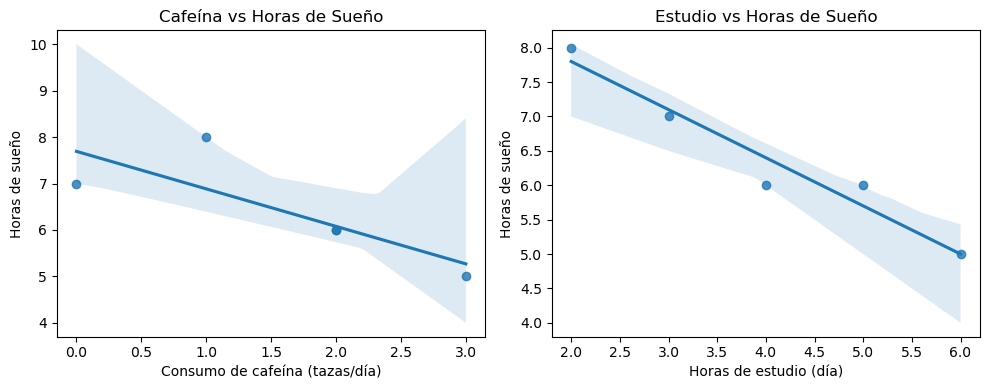


Coeficientes: [ 2.53169802e-16 -7.00000000e-01]
Intercepto: 9.2
Ecuación: horas_sueno = 9.20 + (0.00)*consumo_cafeina + (-0.70)*horas_estudio

Resultados finales:
   consumo_cafeina  horas_estudio  horas_sueno  prediccion_sueno  \
0                1              2            8               7.8   
1                2              5            6               5.7   
2                0              3            7               7.1   
3                3              6            5               5.0   
4                2              4            6               6.4   

   diferencia_ref  
0               0  
1               2  
2               1  
3               3  
4               2  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    'nombres': ['Randall', 'Mati', 'Gabo', 'Nelson', 'Roger'],
    'consumo_cafeina': [1, 2, 0, 3, 2],
    'horas_estudio': [2, 5, 3, 6, 4],
    'horas_sueno': [8, 6, 7, 5, 6]
}


df = pd.DataFrame(data)
print("Datos originales:\n", df)


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.regplot(x='consumo_cafeina', y='horas_sueno', data=df, ax=axes[0])
axes[0].set_title('Cafeína vs Horas de Sueño')
axes[0].set_xlabel('Consumo de cafeína (tazas/día)')
axes[0].set_ylabel('Horas de sueño')

sns.regplot(x='horas_estudio', y='horas_sueno', data=df, ax=axes[1])
axes[1].set_title('Estudio vs Horas de Sueño')
axes[1].set_xlabel('Horas de estudio (día)')
axes[1].set_ylabel('Horas de sueño')

plt.tight_layout()
plt.show()

X = df[['consumo_cafeina', 'horas_estudio']]
y = df['horas_sueno']

modelo = LinearRegression()
modelo.fit(X, y)

print("\nCoeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print(f"Ecuación: horas_sueno = {modelo.intercept_:.2f} + ({modelo.coef_[0]:.2f})*consumo_cafeina + ({modelo.coef_[1]:.2f})*horas_estudio")

df['prediccion_sueno'] = modelo.predict(X)
df['diferencia_ref'] = 8 - df['horas_sueno']

print("\nResultados finales:")
print(df[['consumo_cafeina', 'horas_estudio', 'horas_sueno', 'prediccion_sueno', 'diferencia_ref']])
